In [40]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
!pip install google_play_scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
from google_play_scraper import app

import pandas as pd

import numpy as np


In [83]:
from google_play_scraper import Sort, reviews_all
us_reviews = reviews_all(
    'com.zing.zalo',
    sleep_milliseconds=0, # defaults to 0
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)


In [44]:
df = pd.DataFrame(np.array(us_reviews),columns=['review'])


df = df.join(pd.DataFrame(df.pop('review').tolist()))



df.head(100)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,def55e31-6bb3-4a2f-ad40-100962ce3d56,Chúc Nguyễn,https://play-lh.googleusercontent.com/a-/AD_cM...,Tự tiện tải file về máy khi chủ tài khoản khôn...,1,0,23.05.01,2023-06-06 14:56:07,"Chào bạn. Để tiện hỗ trợ bạn hơn, bạn vui lòng...",2023-06-07 07:37:12,23.05.01
1,5569e90f-b216-4113-8264-ab3aee7de958,Joseph Ng,https://play-lh.googleusercontent.com/a/AAcHTt...,Version này ngớ ngẩn ghê. Videos dọc mà bị xoa...,1,0,None,2023-06-05 23:05:36,"Chào bạn. Để tiện hỗ trợ bạn hơn, bạn vui lòng...",2023-06-06 08:48:58,None
2,b3af1b96-bb28-4e2d-ad8c-a0a42e3e80a2,minh doc tran,https://play-lh.googleusercontent.com/a-/AD_cM...,Perpect,5,0,19.01.02.r5.medium,2023-06-05 02:19:36,None,NaT,19.01.02.r5.medium
3,be4798f8-8ed7-4a58-a570-292a1244c06a,Thắng Bùi,https://play-lh.googleusercontent.com/a-/AD_cM...,Ok,5,0,23.04.01,2023-06-04 01:56:44,None,NaT,23.04.01
4,e0557e16-9e0c-4e83-9cb1-c0b71b96a898,Seow ChengYi,https://play-lh.googleusercontent.com/a/AAcHTt...,I tried login but it said not registered with ...,1,1,23.05.01,2023-06-03 16:13:03,"Dear\nFor your convenience, please provide scr...",2023-06-05 05:25:43,23.05.01
...,...,...,...,...,...,...,...,...,...,...,...
95,f4d8d942-535a-426c-8f70-88483ce6b973,Bao le,https://play-lh.googleusercontent.com/a/AAcHTt...,"Thời gian gọi bị giới hạn, ko thông báo quyền ...",3,0,23.03.02.r2,2023-04-28 15:19:57,"Chào bạn. Để tiện hỗ trợ bạn hơn, bạn vui lòng...",2023-05-04 07:18:14,23.03.02.r2
96,bc2d3813-d6f9-4027-be7d-30f37629b66b,clstudio applications,https://play-lh.googleusercontent.com/a/AAcHTt...,"Chức năng tạo bộ sưu tập trong ""Cloud của tôi""...",1,0,23.03.02.r2,2023-04-28 05:57:02,"Chào bạn. Để tiện hỗ trợ bạn hơn, bạn vui lòng...",2023-05-04 07:42:17,23.03.02.r2
97,47727ac6-aefc-44c2-809b-3cb2f344c57e,Truong Hoang Ha,https://play-lh.googleusercontent.com/a/AAcHTt...,"Hỏi danh bạ hoài, bực vãi",1,0,21.01.01.r1,2023-04-27 15:19:50,"Chào bạn. Để tiện hỗ trợ bạn hơn, bạn vui lòng...",2023-04-28 05:29:18,21.01.01.r1
98,75046c8f-1e2d-4ecd-8192-b7678b7016cc,Yen Dang,https://play-lh.googleusercontent.com/a/AAcHTt...,good,5,0,23.03.02.r1,2023-04-27 06:21:44,None,NaT,23.03.02.r1


In [45]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

# Misc.
import warnings
warnings.filterwarnings('ignore')


In [46]:
# Set intial variables and constants
%config InlineBackend.figure_format='retina'

# Graph Designs
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

# Random seed for reproducibilty
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# Set GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [47]:
# Function to convert score to sentiment
def to_sentiment(rating):
    
    rating = int(rating)
    
    # Convert to class
    if rating <= 2:
        return 0
    elif rating == 3:
        return 1
    else:
        return 2

# Apply to the dataset 
df['sentiment'] = df.score.apply(to_sentiment)


In [48]:
df.head(100)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment
0,def55e31-6bb3-4a2f-ad40-100962ce3d56,Chúc Nguyễn,https://play-lh.googleusercontent.com/a-/AD_cM...,Tự tiện tải file về máy khi chủ tài khoản khôn...,1,0,23.05.01,2023-06-06 14:56:07,"Chào bạn. Để tiện hỗ trợ bạn hơn, bạn vui lòng...",2023-06-07 07:37:12,23.05.01,0
1,5569e90f-b216-4113-8264-ab3aee7de958,Joseph Ng,https://play-lh.googleusercontent.com/a/AAcHTt...,Version này ngớ ngẩn ghê. Videos dọc mà bị xoa...,1,0,None,2023-06-05 23:05:36,"Chào bạn. Để tiện hỗ trợ bạn hơn, bạn vui lòng...",2023-06-06 08:48:58,None,0
2,b3af1b96-bb28-4e2d-ad8c-a0a42e3e80a2,minh doc tran,https://play-lh.googleusercontent.com/a-/AD_cM...,Perpect,5,0,19.01.02.r5.medium,2023-06-05 02:19:36,None,NaT,19.01.02.r5.medium,2
3,be4798f8-8ed7-4a58-a570-292a1244c06a,Thắng Bùi,https://play-lh.googleusercontent.com/a-/AD_cM...,Ok,5,0,23.04.01,2023-06-04 01:56:44,None,NaT,23.04.01,2
4,e0557e16-9e0c-4e83-9cb1-c0b71b96a898,Seow ChengYi,https://play-lh.googleusercontent.com/a/AAcHTt...,I tried login but it said not registered with ...,1,1,23.05.01,2023-06-03 16:13:03,"Dear\nFor your convenience, please provide scr...",2023-06-05 05:25:43,23.05.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,f4d8d942-535a-426c-8f70-88483ce6b973,Bao le,https://play-lh.googleusercontent.com/a/AAcHTt...,"Thời gian gọi bị giới hạn, ko thông báo quyền ...",3,0,23.03.02.r2,2023-04-28 15:19:57,"Chào bạn. Để tiện hỗ trợ bạn hơn, bạn vui lòng...",2023-05-04 07:18:14,23.03.02.r2,1
96,bc2d3813-d6f9-4027-be7d-30f37629b66b,clstudio applications,https://play-lh.googleusercontent.com/a/AAcHTt...,"Chức năng tạo bộ sưu tập trong ""Cloud của tôi""...",1,0,23.03.02.r2,2023-04-28 05:57:02,"Chào bạn. Để tiện hỗ trợ bạn hơn, bạn vui lòng...",2023-05-04 07:42:17,23.03.02.r2,0
97,47727ac6-aefc-44c2-809b-3cb2f344c57e,Truong Hoang Ha,https://play-lh.googleusercontent.com/a/AAcHTt...,"Hỏi danh bạ hoài, bực vãi",1,0,21.01.01.r1,2023-04-27 15:19:50,"Chào bạn. Để tiện hỗ trợ bạn hơn, bạn vui lòng...",2023-04-28 05:29:18,21.01.01.r1,0
98,75046c8f-1e2d-4ecd-8192-b7678b7016cc,Yen Dang,https://play-lh.googleusercontent.com/a/AAcHTt...,good,5,0,23.03.02.r1,2023-04-27 06:21:44,None,NaT,23.03.02.r1,2


In [49]:
df.sentiment.value_counts()

2    10494
0     4462
1     1533
Name: sentiment, dtype: int64

In [50]:
df.dtypes

reviewId                        object
userName                        object
userImage                       object
content                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
replyContent                    object
repliedAt               datetime64[ns]
appVersion                      object
sentiment                        int64
dtype: object

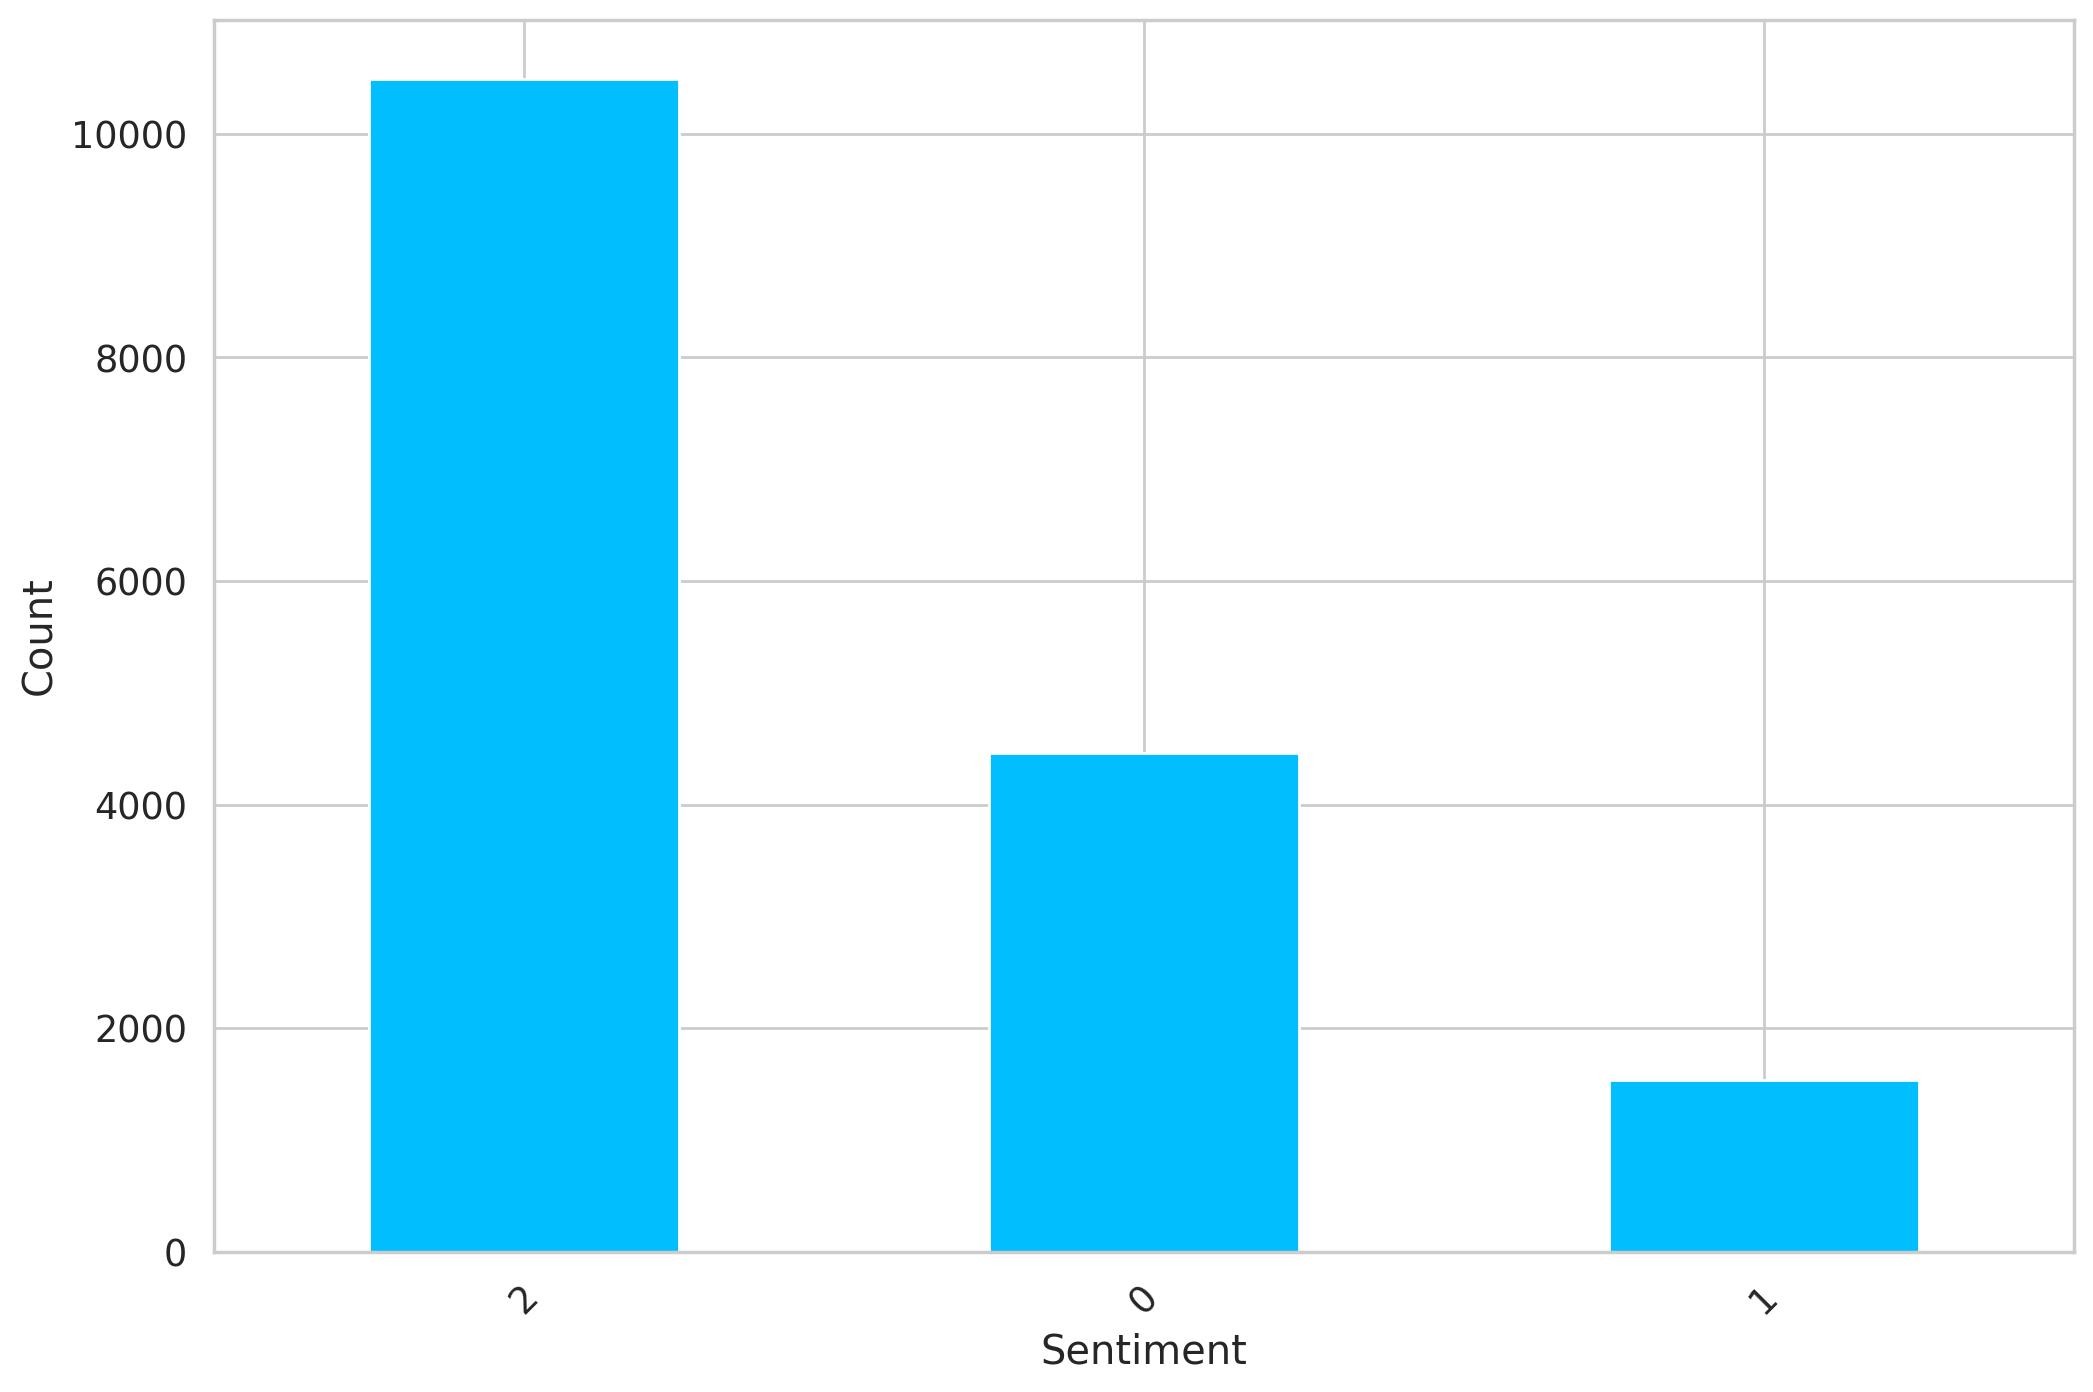

In [51]:
# Plot the distribution
class_names = ['negative', 'neutral', 'positive']
df.sentiment.value_counts().plot(kind= 'bar', y = class_names)
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()


In [52]:
# Set the model name
MODEL_NAME = 'bert-base-cased'

# Build a BERT based tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)


In [53]:
# Some of the common BERT tokens
print(tokenizer.sep_token, tokenizer.sep_token_id) # marker for ending of a sentence
print(tokenizer.cls_token, tokenizer.cls_token_id) # start of each sentence, so BERT knows we’re doing classification
print(tokenizer.pad_token, tokenizer.pad_token_id) # special token for padding
print(tokenizer.unk_token, tokenizer.unk_token_id) # tokens not found in training set 


[SEP] 102
[CLS] 101
[PAD] 0
[UNK] 100


In [54]:
# Store length of each review 
token_lens = []

# Iterate through the content slide
for txt in df.content:
    print(txt)
    tokens = tokenizer.encode(str(txt), max_length=512, truncation=True)
    token_lens.append(len(tokens))


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Máy mình sử dụng zalo 1thời gian, bỗng 1ngày đẹp trời, nhận ra là không tải đc ảnh từ trên tường về.  Mình cứ tưởng là do đang dùng phiên bản cũ nên bị hạn chế, tìm cách để update lên pb mới nhất. Vậy mà, giờ không cả việc nhìn thấy ảnh để tải về. Sửa giúp tui với, pleaseeee T.T
what  tai sao k vao dk
Android 6.0 ko load đc ảnh
Thanks
Ko hiển thị được hình ảnh
Mất mục xem trước với bỏ trạng thái đã xem ở đâu rồi?
Chan
whow ung dung cung hay
Ex
Love
Qua tot lun nhung moi toi bi loi o phan tim quanh day bi loi tan so hoi lon son
Thank ad
Luôn tự động đồng bộ hóa lúc k cần mặc dù đã tắt tự đồng bộ
Hjhh
Cuộc gọi thoại khó nghe qua
Hay the ban
Em muốn góp ý là zalo có chức năng thay đổi số điện thoại đi ạ.Xóa nick em thấy không nỡ
Phiên bản mới của zalo chỗ soạn tn mới khi dùng bàn phím GO keyboard bị lỗi, từ cuối cùng của tn trước luôn bị sót lại ở tn sau. Phải bấm xóa từ ấy mới soạn tiếp được. Bạn mình cũ

Text(0.5, 0, 'Token count')

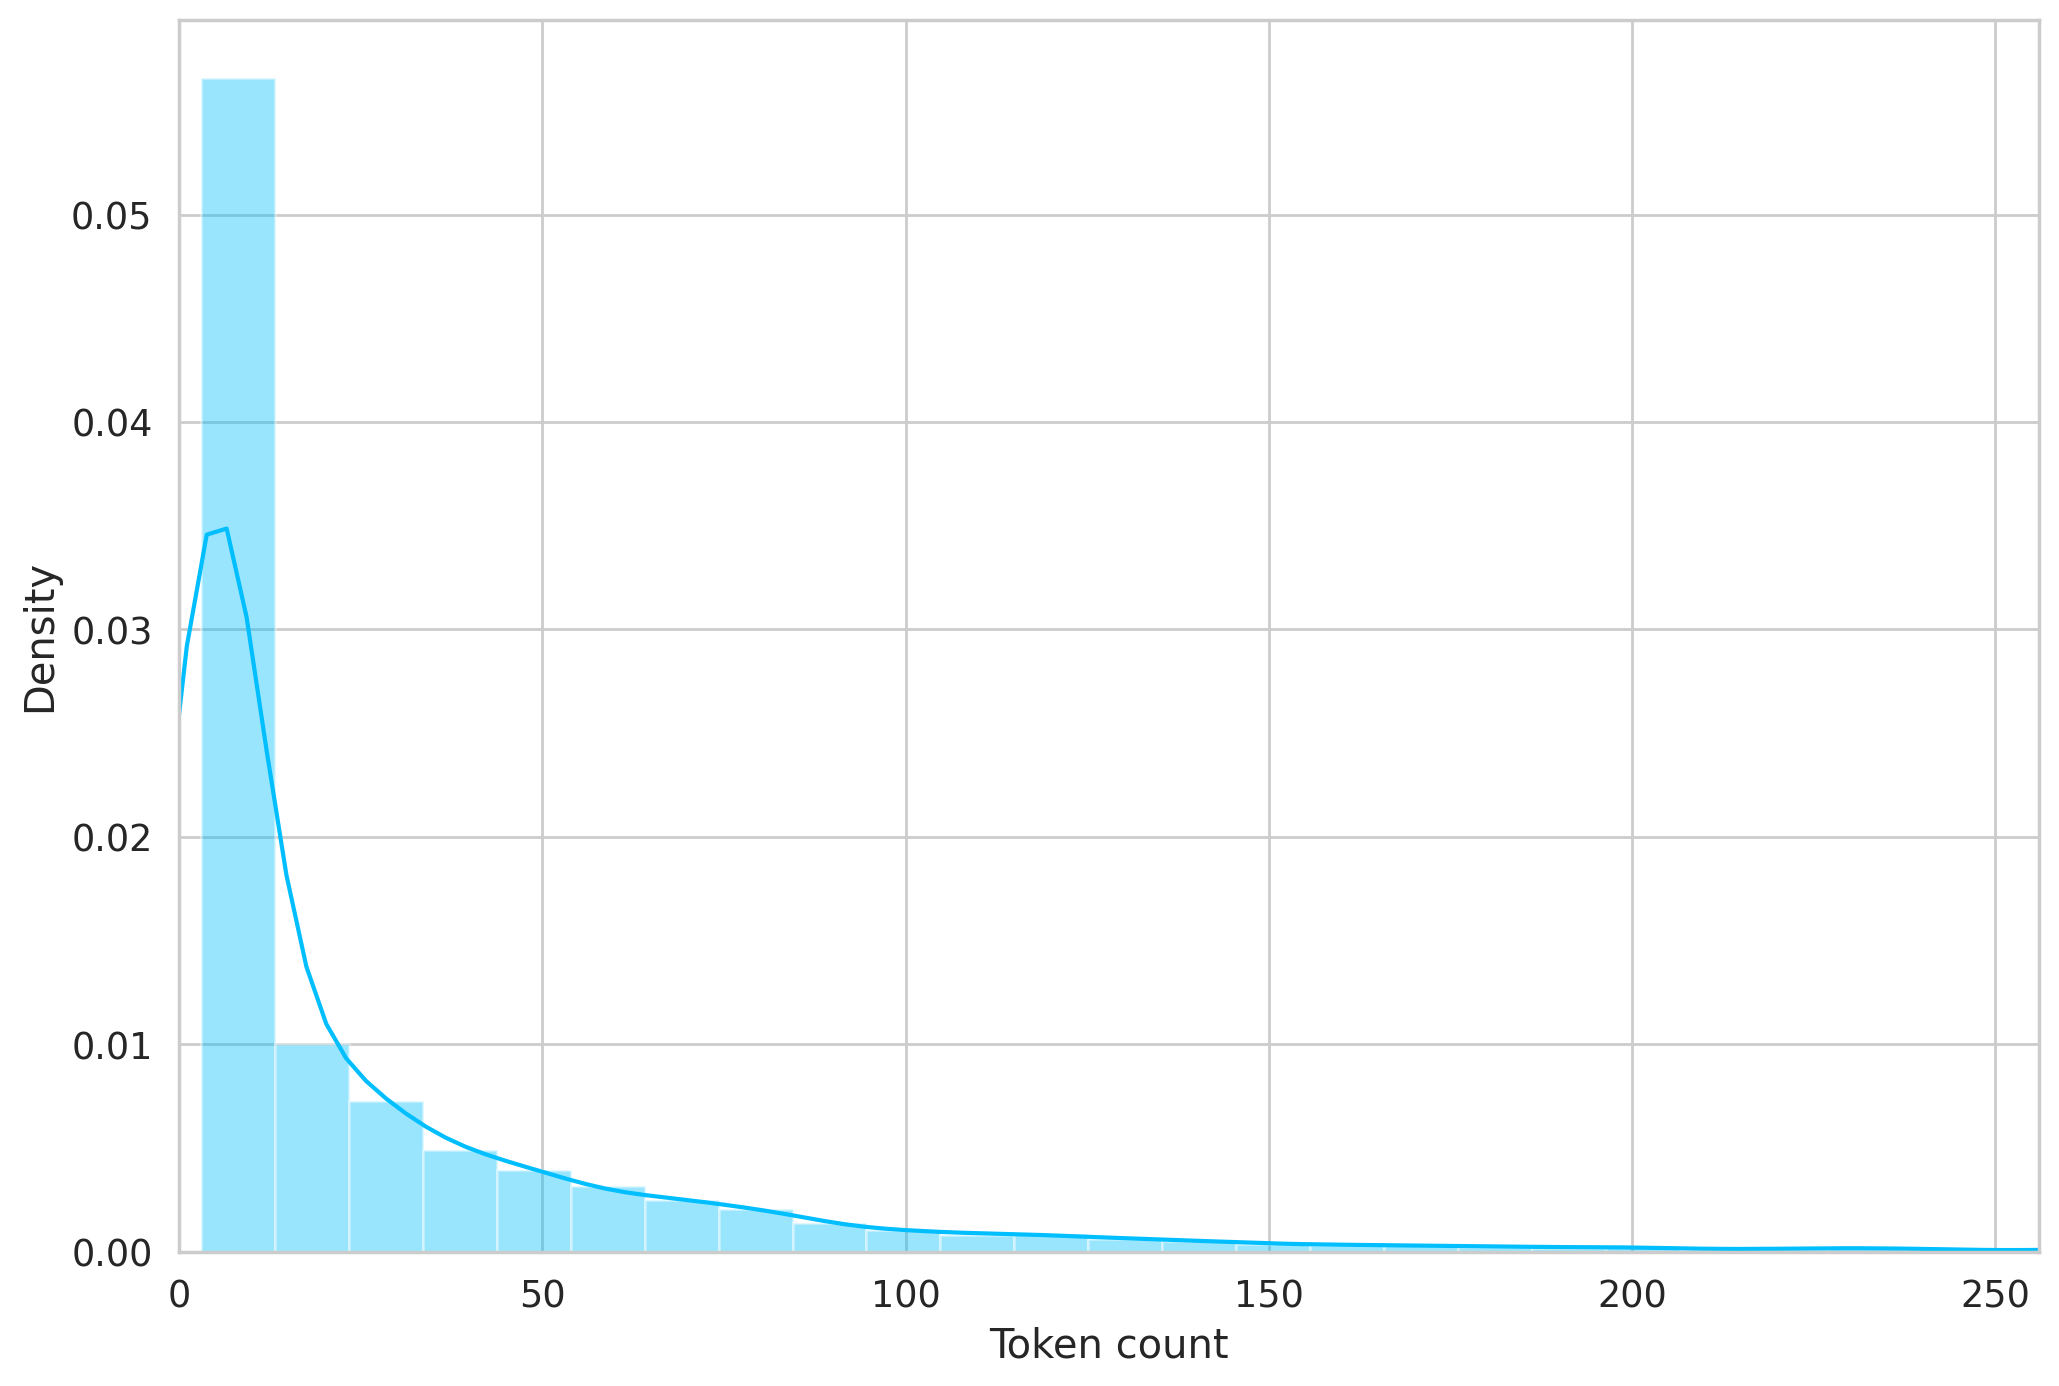

In [55]:
# plot the distribution of review lengths 
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count')


In [56]:
MAX_LEN = 160


In [57]:
class GPReviewDataset(Dataset):
    # Constructor Function 
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    # Length magic method
    def __len__(self):
        return len(self.reviews)
    
    # get item magic method
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]
        
        # Encoded format to be returned 
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }


In [58]:
RANDOM_SEED = 10

In [59]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

print(df_train.shape, df_val.shape, df_test.shape)


(13191, 12) (1649, 12) (1649, 12)


In [60]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = GPReviewDataset(
        reviews=df.content.to_numpy(),
        targets=df.sentiment.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )
    
    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=0
    )


In [61]:
# Create train, test and val data loaders
BATCH_SIZE = 16
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)


In [62]:
# Examples 
data = next(iter(train_data_loader))
print(data.keys())

print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])
torch.Size([16, 160])
torch.Size([16, 160])
torch.Size([16])


In [63]:
# Load the basic BERT model 
bert_model = BertModel.from_pretrained(MODEL_NAME)


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [128]:
# Build the Sentiment Classifier class 
class SentimentClassifier(nn.Module):
    
    # Constructor class 
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(MODEL_NAME)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
    
    # Forward propagaion class
    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(
          input_ids=input_ids,
          attention_mask=attention_mask,
          return_dict=False
        )
        #  Add a dropout layer 
        output = self.drop(pooled_output)
        return self.out(output)


In [129]:
# Instantiate the model and move to classifier
model = SentimentClassifier(len(class_names))
model = model.to(device)


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [113]:
# Number of hidden units
print(bert_model.config.hidden_size)


768


In [114]:
model

SentimentClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

In [154]:
# Number of iterations 
EPOCHS = 5

# Optimizer Adam 
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Set the loss function 
loss_fn = nn.CrossEntropyLoss().to(device)


In [72]:
import torch


In [98]:
model = model.to(device)


In [155]:
# Function for a single training iteration
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0
    
    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = model(
            input_ids = input_ids,
            attention_mask=attention_mask
        )
        
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())
        
        # Backward prop
        loss.backward()
        
        # Gradient Descent
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
    
    return correct_predictions.double() / n_examples, np.mean(losses)

In [156]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    
    losses = []
    correct_predictions = 0
    
    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            
            # Get model ouptuts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)
            
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())
            
    return correct_predictions.double() / n_examples, np.mean(losses)


In [157]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    
    # Show details 
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print("-" * 10)
    
    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )
    
    print(f"Train loss {train_loss} accuracy {train_acc}")
    
    # Get model performance (accuracy and loss)
    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_val)
    )
    
    print(f"Val   loss {val_loss} accuracy {val_acc}")
    print()
    
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    
    # If we beat prev performance
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

Epoch 1/5
----------
Train loss 0.6914336037184253 accuracy 0.7075278599044803
Val   loss 0.6303766078960437 accuracy 0.7562158884172225

Epoch 2/5
----------
Train loss 0.5767427482839786 accuracy 0.7814418921992268
Val   loss 0.6308205971637597 accuracy 0.7768344451182535

Epoch 3/5
----------
Train loss 0.4881598542224277 accuracy 0.823136987339853
Val   loss 0.671923216790534 accuracy 0.7628865979381444

Epoch 4/5
----------
Train loss 0.40747541256700504 accuracy 0.85672049124403
Val   loss 0.7409004386371145 accuracy 0.7489387507580352

Epoch 5/5
----------
Train loss 0.3602121581724196 accuracy 0.8782503221893716
Val   loss 0.8240345671701317 accuracy 0.7386294724075197

CPU times: user 30min 1s, sys: 10.5 s, total: 30min 12s
Wall time: 30min 32s


In [161]:
temp =  history['train_acc']

In [163]:
history['train_acc']

[tensor(0.7075, dtype=torch.float64),
 tensor(0.7814, dtype=torch.float64),
 tensor(0.8231, dtype=torch.float64),
 tensor(0.8567, dtype=torch.float64),
 tensor(0.8783, dtype=torch.float64)]

In [160]:
history['val_acc']

[tensor(0.7562, device='cuda:0', dtype=torch.float64),
 tensor(0.7768, device='cuda:0', dtype=torch.float64),
 tensor(0.7629, device='cuda:0', dtype=torch.float64),
 tensor(0.7489, device='cuda:0', dtype=torch.float64),
 tensor(0.7386, device='cuda:0', dtype=torch.float64)]

In [165]:
for i in range(len(temp)):
    temp[i] = temp[i].cpu()


In [164]:
temp = history['val_acc']

In [167]:
for i in range(len(temp)):
    temp[i] = temp[i].cpu()


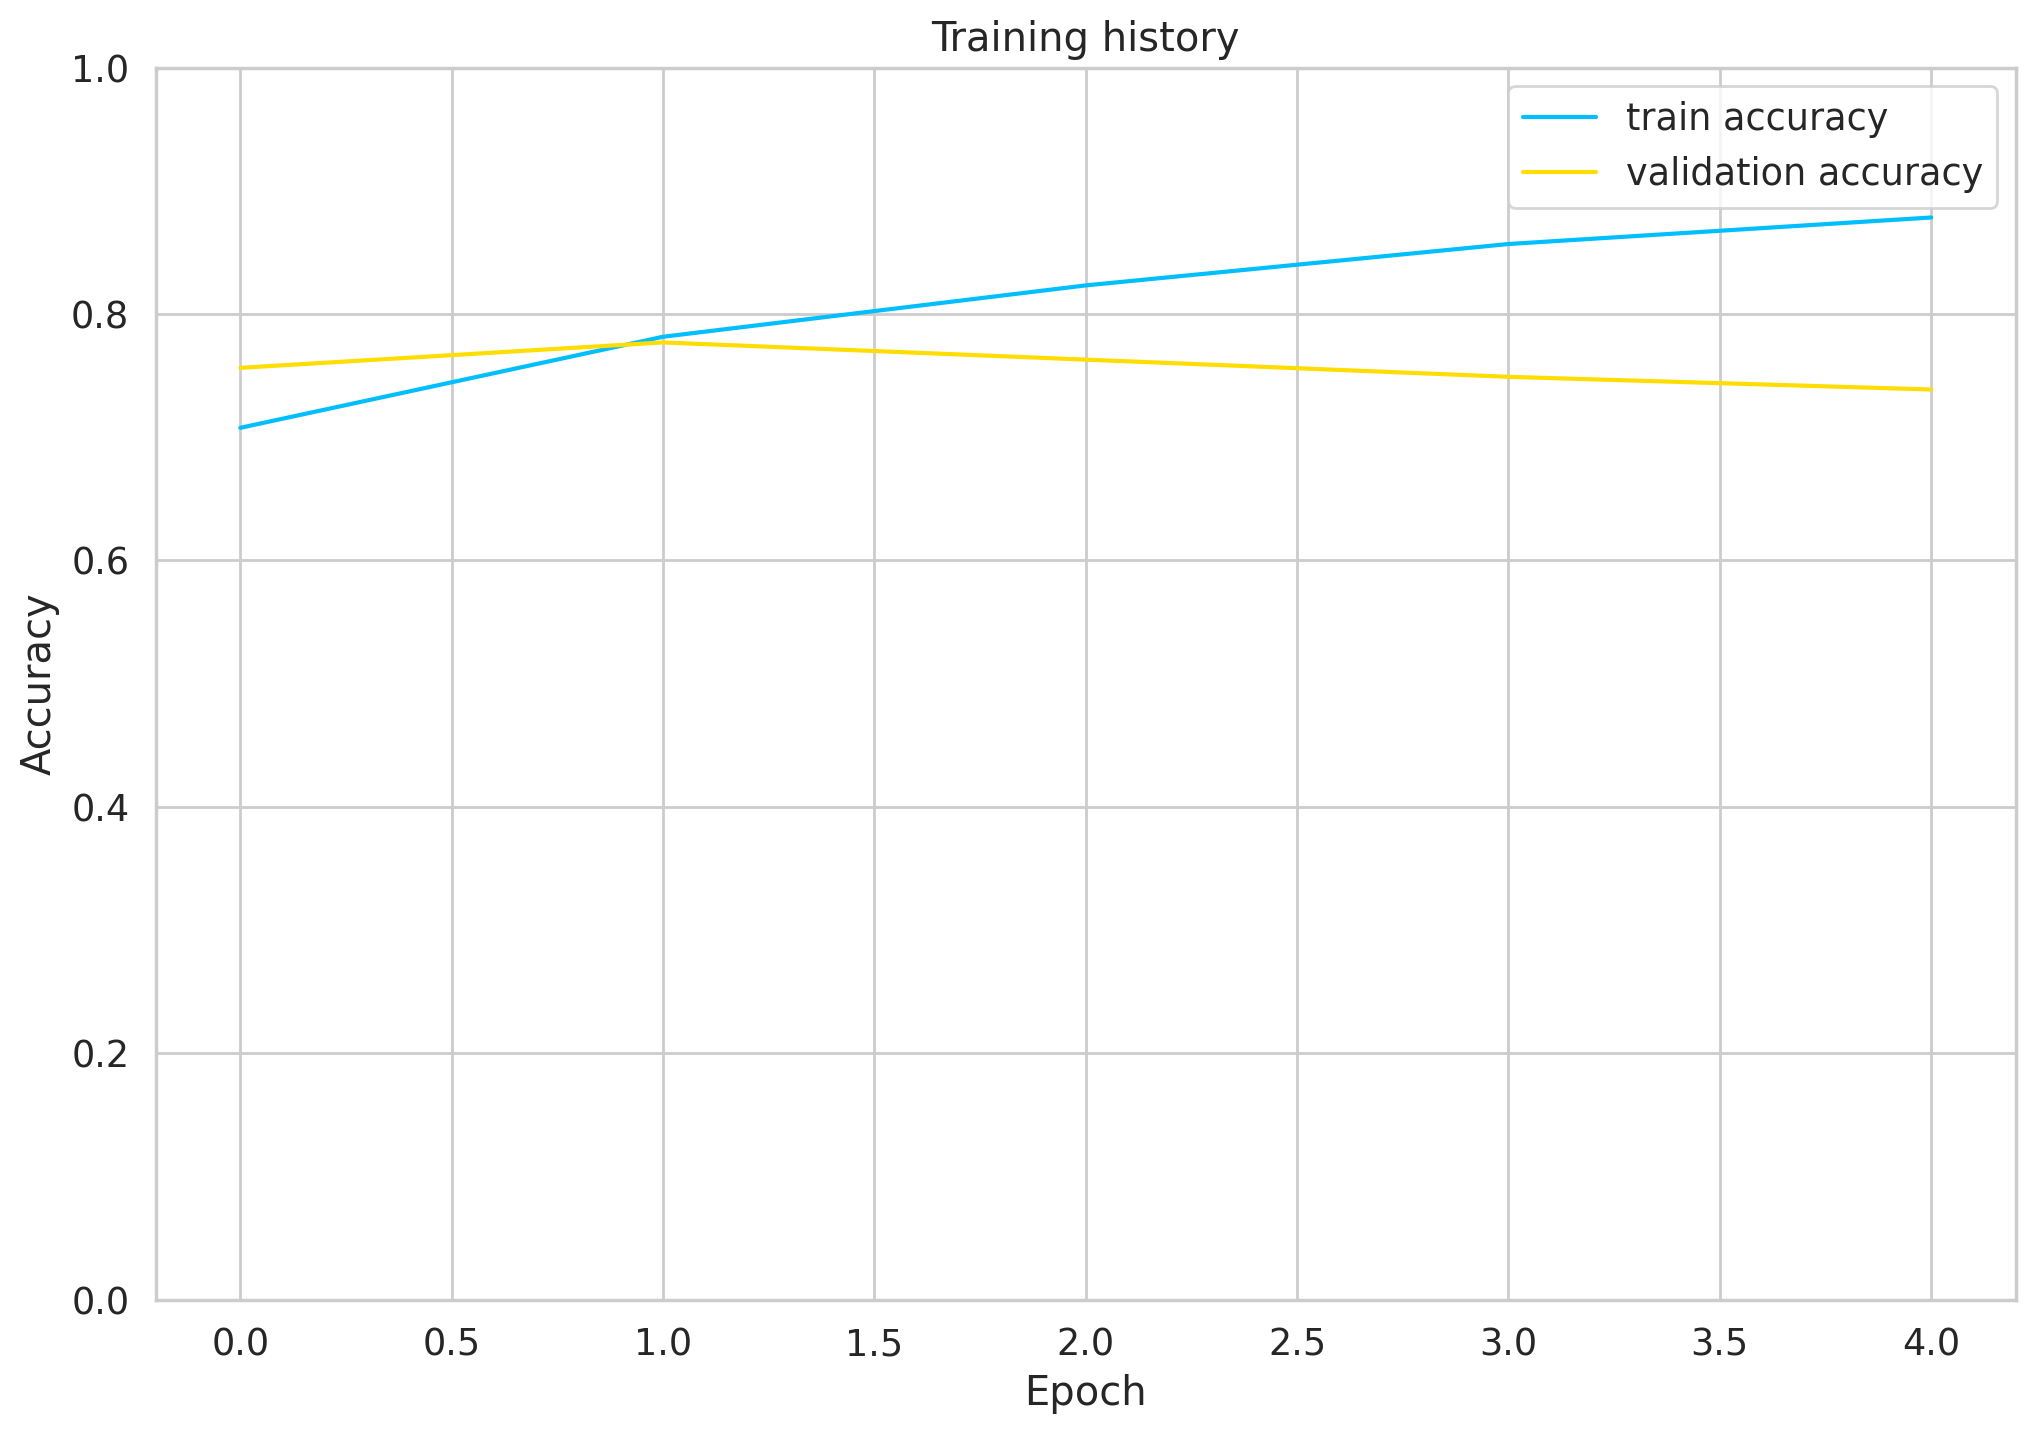

In [166]:
# Plot training and validation accuracy
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

# Graph chars
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);
